***
***
# Programming for Data Analysis Project 
***
***

## Simulating a Data Set for a Real-world Phenomenon

## Fionn McCarthy

## Project Scope
The aim of this project is to create a data set by simulation of a real-world phenomenon of choice. This jupyter notebook will detail the research and investigation into this real-world phenomenon and how the different variables in the data set relate to each and how they are derived. 

I will carry out research into variables of interest in this area and utilize the different libraries and functions available in python in order to create the dataset. For the purpose of this project I wanted to simulate the real-world phenomenon of emergency department data, I have a backgroud in healthcare and I think it would be interesting to simulate data based on the emergency department. I decided to explore many different variables for the simulation of this dataset. I aim to generate a dataset that will show a patients record for admission (yes/no), whether patient did not wait to be seen, triage category, patient wait times (total time in the emergency department), arrival by ambulance, source of referral, patient gender and patients age. 

![xplotoutput](images/ed.jpg)

In Ireland Emergency Departments bear a constant headline in the news on a daily basis, this is prior to the current COVID-19 pandemic and has also been a constant presence throughout the pandemic and it appears to be an issue that may seem to be in the public health sector for quite some time in our future. I found an annual review from UL Hospitals Group available online for 2019 which detailed some figures around the emergency department, the Emergency Department at UHL in Limerick had on average of 195 patients per day over the course of 2019 with a total of 71,315 patients presenting in 2019(https://healthservice.hse.ie/filelibrary/ulh/ul-hospitals-group-annual-review-2019.pdf). UL Hospitals Group is a Public Acute Hospital Acute catering for the mid-west region of Ireland catering for a population of approximately 473,000 people across Clare, Limerick and North Tipperary(https://healthservice.hse.ie/healthcare-delivery/ul-hospitals-group/about-ul-hospitals-group/about-ul-hospitals-group.html). I will generate a dataset containing data based off one day of hospital emergency department attendances. 

## Variables of Interest

### Admission (yes/no)
I decided the most interesting variable from the emergency department was whether the patient was admitted as an inpatient or not, as generally whether or not the patient needed to be admitted as an inpatient would be determined by how ill the patient would be when attending the emergency department along with other patient characteristics. I will use the other information on the patients attendance in order to generate this variable. 

If a patient can be treated at the emergency department and then be sent home again once treated then they will not require admission as an inpatient, an inpatient is a patient that requires an overnight stay on the hospital ward. The hospital ward is a separate section in the hospital to the emergency department. The decision on whether to admit the patient or not would come down to the Senior Emergency Department Consultants with the advice of their team.

An analysis of patient characterisitcs at four Irish teaching hospitals in the Dublin area showed that around one in four patients are admitted as inpatients from emergency departments (https://www.lenus.ie/bitstream/handle/10147/296824/CharacteristicsEDAttendances.pdf?sequence=1). 

Use above link to show main factors of admission. 

## Influential Variables
### 1. Patient Age
In a study conducted in four Irish teaching hospitals in Dublin it was shown that patients in an age category of 15 to 24 years old are seven times less likely to be admitted than patients in the 85 and over category https://www.lenus.ie/bitstream/handle/10147/296824/CharacteristicsEDAttendances.pdf?sequence=1. Therefore this variable would have a significant effect on our variable of interest, whether or not the patient was admitted. The older the age of the patient seems to mean an increase risk in hospital admission.  

The variable patient age is the age of the patient at the time of registration to the emergency department. There age of patients attending an emergency department will depend on age cohorts of patients in that particular region. In 2019 the Department of Health prepared a paper called 'Health in Ireland' where it provides summary information on health and healthcare in Ireland over the previous ten years https://assets.gov.ie/45117/6a4f970018d6477bac38f4539f80e927.pdf. The population characteristics presenetd in this publication are based off the 2016 cencus and projections are made for figures for the 2019 year. The below image derives the population distributions across Ireland for 2019: 

![xplotoutput](images/population.png)

I will utilize the above information in order to simulate the age demographic of each patient within the dataset. I will uniformly distribute the age of each patient between each age category. 

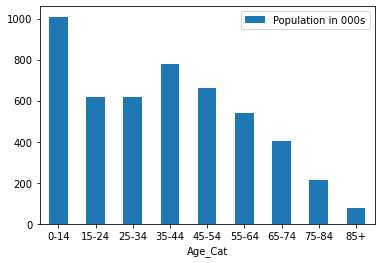

In [1]:
# https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
# import pandas as pd
import pandas as pd
  
# list of age groups
age = ['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']

# list of populations in 000's
population = [1008.9, 618.0, 620.0, 776.9, 661.6, 539.7, 404.1, 214.9, 77.3]

# sum population 
population_total = 1008.9 + 618.0 + 620.0 + 776.9 + 661.6 + 539.7 + 404.1 + 214.9 + 77.3

#  create array of population percent 
population_percent = [(i / population_total)*100 for i in population]

df = pd.DataFrame(list(zip(age, population, population_percent)), columns =['Age_Cat', 'Population in 000s', 'Pop%'])
df

ax = df.plot.bar(x='Age_Cat', y='Population in 000s', rot=0)

The above plot shows that the population in Ireland is positively skewed or also skewed to the right. 

In [2]:
df

,Age_Cat,Population in 000s,Pop%
0,0-14,1008.9,20.500264
1,15-24,618.0,12.557402
2,25-34,620.0,12.598041
3,35-44,776.9,15.786158
4,45-54,661.6,13.443329
5,55-64,539.7,10.966392
6,65-74,404.1,8.211078
7,75-84,214.9,4.366644
8,85+,77.3,1.570691


Given the above research I found it would be best to unifromly distribute the data beween each age bucket. I will use the percentage breakdown in each case to simulate the population sample. I will assume a max age of 100 for the purpose of this simulation. Therefore I will generate the data as follows:
* 20% between 0 and 14.
* 13% between 15 and 24.
* 13% between 25 and 34.
* 16% between 35 and 44.
* 13% between 45 and 54.
* 11% between 55 and 64.
* 8% between 65 and 74.
* 4% between 75 and 84.
* 2% between 85 and 100.

I will use the NumPy library in order to generate these randome integers between these ages categories and create a dataframe. 

In [3]:
import numpy as np

rng = np.random.default_rng()

a = rng.integers(0,15, size=40)
b = rng.integers(15,25, size=26)
c = rng.integers(25,35, size=26)
d = rng.integers(35,45, size=32)
e = rng.integers(45,55, size=26)
f = rng.integers(55,65, size=22)
g = rng.integers(65,75, size=16)
h = rng.integers(75,85, size=8)
i = rng.integers(85,100, size=4)

age_a = pd.DataFrame(a,  columns=["age"])
age_b = pd.DataFrame(b,  columns=["age"])
age_c = pd.DataFrame(c,  columns=["age"])
age_d = pd.DataFrame(d,  columns=["age"])
age_e = pd.DataFrame(e,  columns=["age"])
age_f = pd.DataFrame(f,  columns=["age"])
age_g = pd.DataFrame(g,  columns=["age"])
age_h = pd.DataFrame(h,  columns=["age"])
age_i = pd.DataFrame(i,  columns=["age"])
#age_df

age_df = pd.concat([age_a, age_b, age_c, age_d, age_e, age_f, age_g, age_h, age_i], ignore_index=True)
age_df = age_df.sample(frac=1)
age_df

,age
39,1
43,17
74,29
48,15
139,50
...,...
97,37
6,8
73,29
177,69


(array([31., 24., 21., 30., 22., 27., 21., 12.,  8.,  4.]),
 array([ 0. ,  9.4, 18.8, 28.2, 37.6, 47. , 56.4, 65.8, 75.2, 84.6, 94. ]),
 <BarContainer object of 10 artists>)

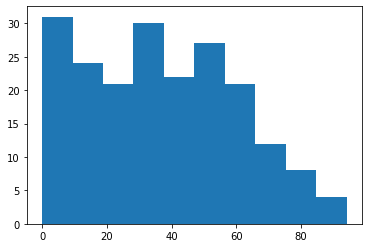

In [4]:
import matplotlib.pyplot as plt
plt.hist(age_df)

### 2. Triage Category 
In the study conducted in four Irish teaching hospitals in Dublin it was shown that patients triage category would have a significant impact on the patients outcome within the emergency department  https://www.lenus.ie/bitstream/handle/10147/296824/CharacteristicsEDAttendances.pdf?sequence=1. This would make sense as a triage nurse with clinical experience will be assigning each patient their urgnecy category and if a patient is more urgent it would generally mean their injury is more serious and then this would possibly lead to a higher risk of hospital admission. Therefore this variable would have a significant effect on our variable of interest, whether or not the patient was admitted. The lower the category (more urgent) appears to have an increase in likelihood of hospital admission.

Triage category is the Manchester Triage Score system which is utilized across all Irish emergency departments, it enables the triage nurse (nurse who first assesses patient) to evaluate the urgency of the attendance to the emergency department. The triage nurse will assign a clinical priority to the patient upon evaluation whic is solely based off signs and sypmtoms and not from underlying conditions (https://www.hse.ie/eng/services/publications/clinical-strategy-and-programmes/infographic-emergency-medicine.pdf). 

![xplotoutput](images/triage.jpg)

image source: https://www.hse.ie/eng/services/publications/clinical-strategy-and-programmes/infographic-emergency-medicine.pdf

In order to simulate such a categorical varibale, I investigated what proportions of patients attended via each triage categories at other emergency departments around the world. A study on 'Agreement between triage category and patient’s perception of priority in emergency departments' was carried out on across eight emergency department's in Queensland in Australia shows the assigned triage categories for 406 pateints that were sampled. 0.2% were assigned triage category 1, 6.7% triage category 2, 33% triage category 3, 52.5% triage category 4 and 7.6% triage category 5 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5070359/. 

In [14]:
# list of triage categories
triage_cat = ['1', '2', '3', '4', '5']

# assigning probability of each triage category
triage_array = rng.choice(triage_cat, 200, p=[0.002, 0.067, 0.33, 0.525, 0.076])
triage_array

triage = pd.DataFrame(triage_array,  columns=["triage_category"])
triage

,triage_category
0,3
1,3
2,4
3,4
4,2
...,...
195,3
196,4
197,4
198,3


<AxesSubplot:>

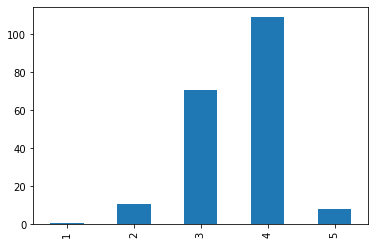

In [16]:
# https://stackoverflow.com/questions/65708947/change-x-axis-order-of-labels-in-pandas-matplotlib-histogram
triage.triage_category.value_counts().loc[['1', '2', '3', '4', '5']].plot.bar()

In [8]:
# plt.style.use('ggplot')
# possible COVID???

### 3. Referral Source
The variable referral source has also been noted as a significant factor in the outcome of whether or not a patient is admitted as an inpatient from the emergecny department. In this case I will investigate two different types of referrals, self-referral or GP referral. 

In the study previously carried out around characteristics of emergency department attendnaces in the Dublin area, it was found that almost 79% of patients are self-referrers. https://www.lenus.ie/bitstream/handle/10147/296824/CharacteristicsEDAttendances.pdf?sequence=1 

### 4. RArrival by Ambulance 

### Pateint Did not Wait (DNW) to be Seen
DNW https://www.health-ni.gov.uk/news/emergency-care-waiting-time-statistics-january-march-2019 percenatge did not wait - UK

### Patient Experience Time (PET)
PET compliance https://www.imo.ie/news-media/publications/Compliance-PP.pdf 

https://www.lenus.ie/bitstream/handle/10147/296824/CharacteristicsEDAttendances.pdf?sequence=1 - Characteristics of emergency departments attendances in four Irish teaching hospitals

